In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 2.18 Floor

The points are : 
[[ 599 1041]
 [ 611  723]
 [1136  717]
 [1004 1047]]
l1  [    318      12 -202974]
l2  [  -330   -132 469524]
l3  [    324     537 -753093]
m1  [     -6     405 -418011]
m2  [      6     525 -383241]
m3  [  -324    393 -86175]
Equation :  (84845367666, -59239140651.0, -179940918564, 166146279849.0, 124077611313.0, 64897895340) c = 0


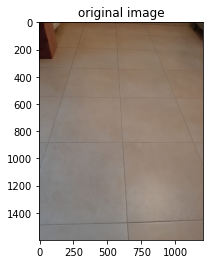

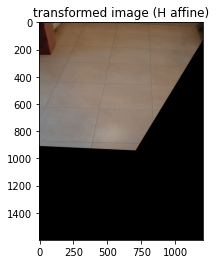

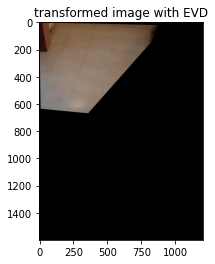

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.color import rgb2gray
from skimage import transform

GREYSCALE = 1
RGB = 2

h = 1600
w = 1200


def read_image(filename, representation):
    """
    :param filename: picture filename
    :param representation: RGB / GREYSCALE
    :return: numpy array representing the image
    """
    im = imread(filename).astype(np.float64)
    if (representation== RGB):
        im = im / 255
        return im
    elif (representation == GREYSCALE and im.ndim != 2):
        return rgb2gray(im)
    else:
      print("Error - image representation is undefiened")


# def cross_product(p1, p2):
#     new_line = np.cross(p2, p1)
#     return new_line / new_line[2]
#     # return new_line 


def reflect_point(point):
    return np.array([point[0], h - point[1], 1])


""" points """
n = 1200

p4 = np.array([1004,553, 1])
p3 = np.array([1136, 883, 1])
p2 = np.array([611,877, 1])
p1 = np.array([599,559, 1])

p1 = reflect_point(p1)
p2 = reflect_point(p2)
p3 = reflect_point(p3)
p4 = reflect_point(p4)
points = np.array([[p1[0], p2[0], p3[0], p4[0]], [p1[1], p2[1], p3[1], p4[1]]]).T
""" / """

""" lines """
l1 = np.cross(p1, p2)
l2 = np.cross(p3, p4)
l3 = np.cross(p1, p3)
m1 = np.cross(p1, p4)
m2 = np.cross(p2, p3)
m3 = np.cross(p2, p4)
""" / """

print("The points are : ")
print(points)
print("l1 ",l1)
print("l2 ",l2)
print("l3 " ,l3)
print("m1 ",m1)
print("m2 ",m2)
print("m3 " ,m3)
# (l1m1, (l1m2 + l2m1)/2, l2m2, (l1m3 + l3m1)/2, (l2m3 + l3m2)/2, l3m3) c = 0
l1m1= l1.dot(m1)
l1m2=l1.dot(m2)
l2m1=l2.dot(m1)
l2m2=l2.dot(m2)
l1m3=l1.dot(m3)
l3m1=l3.dot(m1)
l2m3=l2.dot(m3)
l3m2=l3.dot(m2)
l3m3=l3.dot(m3)
eq = (l1m1, (l1m2 + l2m1)/2, l2m2, (l1m3 + l3m1)/2, (l2m3 + l3m2)/2, l3m3)
print("Equation : ",eq,"c = 0")

""" vanishing line L """
# vanishing points
vanishing_p1 = np.cross(l1, l2)
vanishing_p2 = np.cross(m1, m2)
#vanishing line
L = np.cross(vanishing_p1, vanishing_p2)
""" / """

""" H_1 """
H_1 = np.array([1, 0, 0, 0, 1, 0, L[0] / L[2], L[1] / L[2], L[2] / L[2]]).reshape(3, 3)
""" / """

image = read_image('drive/My Drive/floor.jpeg', RGB)
plt.imshow(image)
plt.title('original image')
plt.show()

imag_c = transform.warp(image, H_1, output_shape=(image.shape))
plt.imshow(imag_c)
plt.title('transformed image (H affine)')
plt.show()

""" part 2 """
""" calculating S """

equations = np.array([[l1[0] * m2[0], l1[0] * m2[1] + l1[1] * m2[0]], [l3[0] * m3[0], l3[0] * m3[1] + l3[1] * m3[0]]])
solution = np.array([[-l1[1] * m2[1]], [-l3[1] * m3[1]]])
#solve the equations
s1, s2 = np.linalg.solve(equations, solution)
S = np.array([s1[0], s2[0], s2[0], 1]).reshape(2, 2)
# Compute the eigenvalues and right eigenvectors of a square array.
eigenvalues, U = np.linalg.eig(S)
Diagonal = np.diag(eigenvalues)
#  the solution is the right singular vector corresponding to the
# smallest singular value of 𝐴 i.e. 𝑠𝑣𝑑 𝐴 = 𝑈𝑆𝑉.𝑇
# S=AA.T so evd(A) = U(S^sqrt)U.T
EVD = U.dot(np.sqrt(Diagonal).dot(U.T))
A = np.array([EVD[0][0], EVD[0][1], -1, EVD[1][0], EVD[1][1], -1, 0, 0, 1]).reshape(3, 3)
HA = np.linalg.inv(H_1).dot(np.linalg.inv(A))
inversed_HA = np.linalg.inv(HA)
imag_c = transform.warp(imag_c, inversed_HA, output_shape=(image.shape[0], image.shape[1]))
plt.imshow(imag_c)
plt.title('transformed image with EVD')
plt.show()

# Cross Ratio

[  -318     12 183774]
[    330    -132 -258324]
[556.5625, -565.59375]


<Figure size 432x288 with 0 Axes>

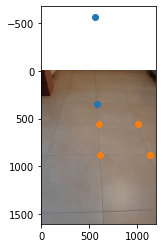

<Figure size 432x288 with 0 Axes>

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.color import rgb2gray
from skimage import transform

GREYSCALE = 1
RGB = 2

h = 1600
w = 1200


""" points """
n = 1200


p4 = np.array([1004,553, 1])
p3 = np.array([1136, 883, 1])

_p2 = np.array([611,877, 1])
_p1 = np.array([599,559, 1])
_p3 = np.array([581, 349, 1])


"""parallel lines """
l1 = np.cross(_p1, _p2)
l2 = np.cross(p3, p4)
""" / """

"""Intersection of two parallel lines will give us a vanishing point"""
P1 = np.cross(l1, l2)

image = read_image('drive/My Drive/floor.jpeg', RGB)

intersection_point = [P1[0]/P1[2],P1[1]/P1[2]]
_p4 = np.array([intersection_point[0],intersection_point[1], 1])
_points = np.array([[_p1[0], _p2[0], _p3[0], _p4[0]], [_p1[1], _p2[1], _p3[1], _p4[1]]]).T
points = np.array([[_p1[0], _p2[0], p3[0], p4[0]], [_p1[1], _p2[1], p3[1], p4[1]]]).T

print(l1)
print(l2)
print(intersection_point)

plt.imshow(image)
plt.scatter(_points[:, 0], _points[:, 1])
plt.scatter(points[:, 0], points[:, 1])
plt.figure()

In [14]:
def det2(a, b): return a[0]*b[1] - a[1]*b[0]
def cr2(a, b, c, d): return (det2(a,c)*det2(b,d))/(det2(a,d)*det2(b,c))

cr2(_points[0],_points[1],_points[2],_points[3])

0.501023513812881

# Conic

Shape  circle
5 Points :  [[1001  451]
 [1085  970]
 [ 653 1330]
 [  89  907]
 [ 575  274]]
a =  -1.3474284371403357e-06
b =  -1.0444998457051423e-07
c =  -1.276581408282604e-06
d =  0.0017016010330114788
e =  0.0021144877880499035
f =  1.0
4ac - b^2:  6.869498568101771e-12
-1.3474284371403358 * x ^ 2 + -0.10444998457051423  * x * y + -1.276581408282604 * y ^ 2 + 1701.6010330114789 * x + 2114.4877880499034  * y + 1000000.0


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


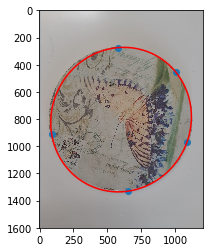

Shape  ellipse
5 Points :  [[545 490]
 [284 622]
 [266 775]
 [698 880]
 [950 604]]
a =  -5.439183788473025e-07
b =  -2.3183217736806905e-07
c =  -1.6307031984023638e-06
d =  0.0008198427247321264
e =  0.002384052433470738
f =  1.0
4ac - b^2:  3.4941316017612795e-12
-0.5439183788473024 * x ^ 2 + -0.23183217736806905  * x * y + -1.6307031984023639 * y ^ 2 + 819.8427247321264 * x + 2384.052433470738  * y + 1000000.0


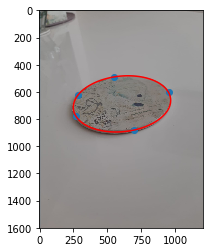

Shape  parabola
5 Points :  [[  44 1543]
 [ 224 1327]
 [ 578 1198]
 [ 959 1324]
 [1139 1537]]
a =  -3.3721426794219123e-07
b =  -1.042256381389018e-09
c =  -2.854900730914249e-07
d =  0.0004016127868072444
e =  0.0010776159430349141
f =  1.0
4ac - b^2:  3.8508421771078556e-13
-0.3372142679421912 * x ^ 2 + -0.001042256381389018  * x * y + -0.28549007309142493 * y ^ 2 + 401.6127868072444 * x + 1077.6159430349142  * y + 1000000.0


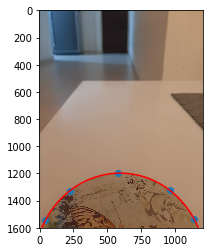

Shape  hyperbola
5 Points :  [[ 413 1510]
 [ 452 1489]
 [ 530 1468]
 [ 581 1471]
 [ 632 1483]]
a =  2.06458030737942e-07
b =  -1.866834411150199e-07
c =  -4.812304000455325e-07
d =  5.019642183470455e-05
e =  0.0014289591837507985
f =  1.0
4ac - b^2:  -4.322662300850758e-13
0.206458030737942 * x ^ 2 + -0.1866834411150199  * x * y + -0.48123040004553247 * y ^ 2 + 50.19642183470455 * x + 1428.9591837507985  * y + 1000000.0


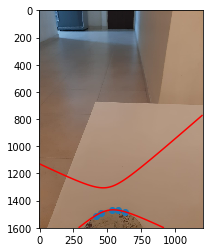

In [58]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
from skimage.color import rgb2gray
from numpy.linalg import lstsq

def reflect_point(point):
    return np.array([point[0], h - point[1], 1])

def five_points_to_conic_parameters(points, f=1.0):
    x = points[:, 0]
    y = points[:, 1]
    if max(x.shape) < 5:
        raise ValueError('Need >= 5 points to solve for conic section')

    coefficient_matrix = np.vstack([x ** 2, x * y, y ** 2, x, y]).T
    # Return the least-squares solution to a linear matrix equation.
    least_squares_solution = lstsq(coefficient_matrix, f * np.ones(x.size), rcond=None)
    (a, b, c, d, e) = least_squares_solution[0]
    return (a, b, c, d, e, f)


def plot_conic(coeffs, filename, points,_canonic_shape):
    im = plt.imread(r'drive/My Drive/' + filename)
    w, h = im.shape[:2]

    x = np.linspace(h, 0, 400)
    y = np.linspace(w, 0, 400)
    x, y = np.meshgrid(x, y)

    a, b, c, d, e, f = coeffs
    print("Shape ", _canonic_shape)
    print("5 Points : ",points)
    print("a = ",a)
    print("b = ",b)
    print("c = ",c)
    print("d = ",d)
    print("e = ",e)
    print("f = ",f)
    print("4ac - b^2: ",  4 * a * c -b*b )
    plt.axhline(0, alpha=.1)
    plt.axvline(0, alpha=.1)

    subplot1 = plt.subplot(111)
    implot = subplot1.imshow(im, interpolation='nearest', alpha=1)
    res = (a * x ** 2 + b * x * y + c * y ** 2 + d * x + e * y + f)
    print(a*(10**6) ,"* x ^ 2 +", b*(10**6)," * x * y +" ,c*(10**6), "* y ^ 2 +", d*(10**6) ,"* x +", e*(10**6)," * y +", f*(10**6))
    subplot1.contour(x, y, res, [2], colors='red')
    subplot1.scatter(points[:, 0], points[:, 1])
    plt.show()


if __name__ == '__main__':
    # CIRCLE
    points = np.array([[1001,451], [1085,970], [653,1330], [89,907], [575,274]])
    plot_conic(five_points_to_conic_parameters(points), 'cir.jpeg', points,"circle")

    # ELLIPSE
    points = np.array([[545,490], [284,622], [266,775], [698,880], [950,604]])
    plot_conic(five_points_to_conic_parameters(points), 'ellipse_from_circle.jpeg', points,"ellipse")

    # PARABOLA

    # points = np.array([[1342,800], [1075,605], [529,632], [280,878], [208,1193]])
    # plot_conic((a, b, c, d, e, f), 'parab.jpeg', points,"parabola")
    #circle
        #     0.2690    0.3680    0.5510    0.8150    0.9080
    # 1.4800    1.3300    1.2250    1.3300    1.4770
    # points = np.array([[269,1480],[368,1330],  [551,1225],[815,1330],  [908,1477]])
    #     0.0440    0.2240    0.5780    0.9590    1.1390
    # 1.5430    1.3270    1.1980    1.3240    1.5370
    points = np.array([[44,1543],[224,1327],  [578,1198],[959,1324],  [1139,1537]])
    a, b, c, d, e, f = five_points_to_conic_parameters(points)
    plot_conic((a, b, c, d, e, f), 'parab_n.jpeg', points,"parabola")
    
    
    # plot_conic((a, b, c, d, e, f), 'my_parab.PNG', points,"parabola")

    # HYPERBOLA
    #     0.4130    0.4520    0.5300    0.5810    0.6320
    # 1.5100    1.4890    1.4680    1.4710    1.4830
    # points = np.array([[443,853],[221,400],  [224,1330],[740,859],  [1034,406]])
    # 0.4130    0.4760    0.5330    0.6260    0.6830
    # 1.5100    1.4800    1.4680    1.4800    1.5070
    points = np.array([[413,1510],[452,1489],  [530,1468],[581,1471],  [632,1483]])
    # points = np.array([[413,1510],[476,1480],  [533,1468],[626,1480],  [683,1507]])
    a, b, c, d, e, f = five_points_to_conic_parameters(points)
    # plot_conic((a, b, c, d, e, f), 'hyperbola_n.jpeg', points,"hyperbola")
    plot_conic((a, b, c, d, e, f), 'hyper_new.jpeg', points,"hyperbola")